In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [34]:
data = pd.read_csv('./data/vgsales.csv')
data = data.drop(columns=['Rank'])

In [35]:
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# EDA
- Because I only want to analyze years 1980-2016

In [36]:
data = data[(data['Year'] != 'N/A') & (data['Year'] != 2017) & (data['Year'] != 2020)]

In [37]:
data.isnull().sum()
data[data['Year'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...
16307,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


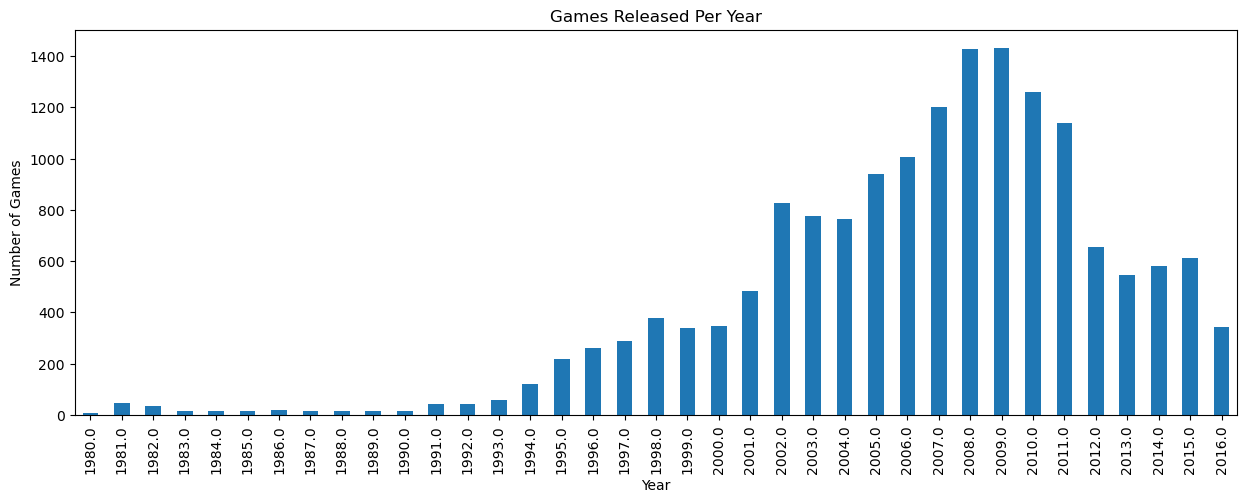

In [38]:
freq_year = data['Year'].value_counts().sort_index()
freq_year.plot(kind='bar', figsize=(15,5))
plt.title('Games Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()


In [39]:
print('Mean:', data['Global_Sales'].mean())
print('Median:', data['Global_Sales'].median())
print('Mode:', data['Global_Sales'].mode()[0])

Mean: 0.5375497167650959
Median: 0.17
Mode: 0.02


In [40]:
print('Standard Deviation:', data['Global_Sales'].std())
print('Variance:', data['Global_Sales'].var())


Standard Deviation: 1.555198396398079
Variance: 2.4186420521591567


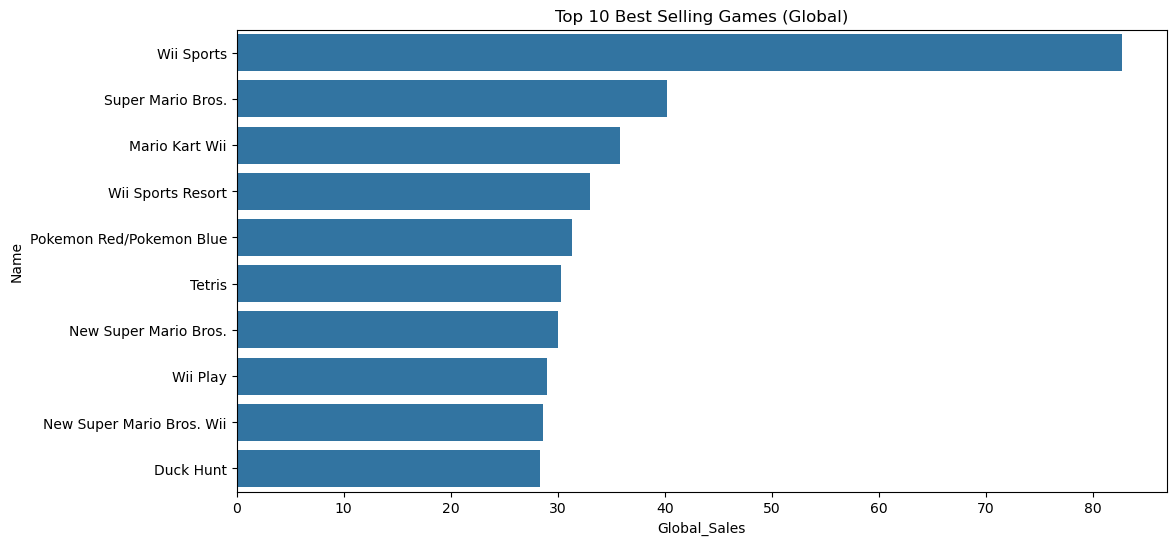

In [41]:
top_games = data[['Name', 'Global_Sales']].sort_values('Global_Sales', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_games, x='Global_Sales', y='Name')
plt.title('Top 10 Best Selling Games (Global)')
plt.show()


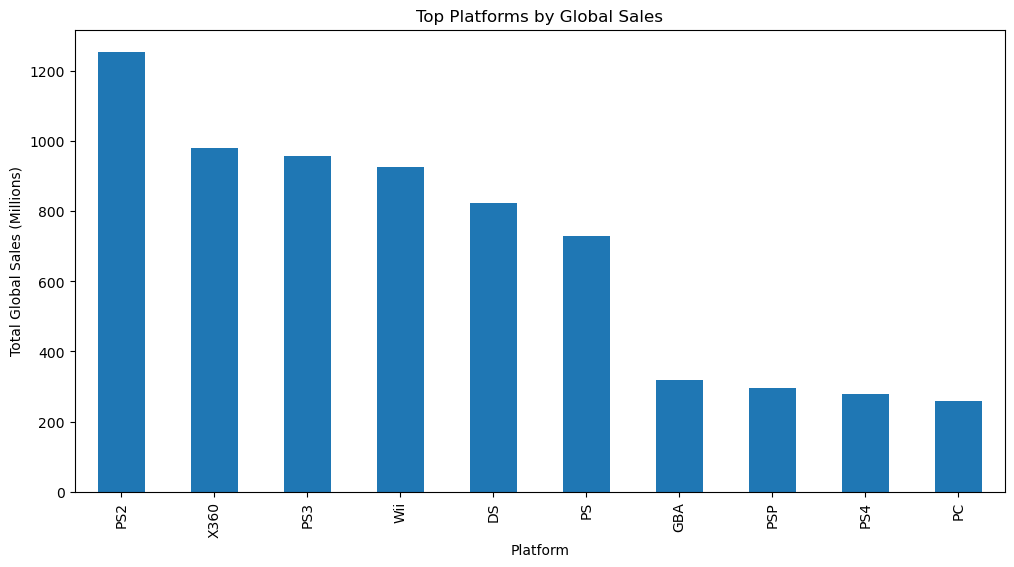

In [42]:
platform_sales = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
platform_sales.plot(kind='bar', figsize=(12,6))
plt.title('Top Platforms by Global Sales')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (Millions)')
plt.show()


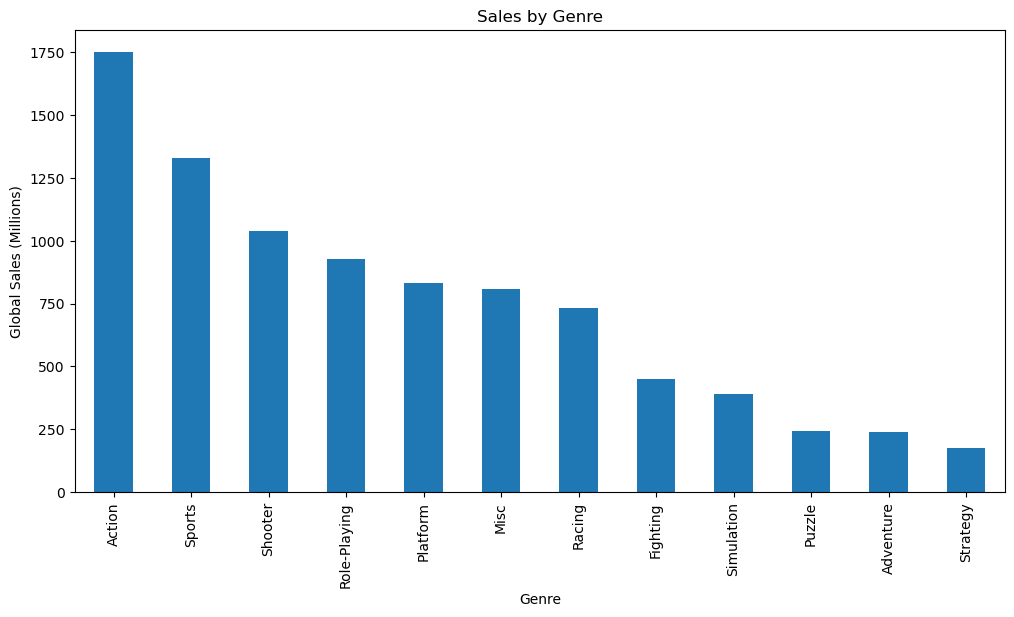

In [43]:
genre_sales = data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', figsize=(12,6))
plt.title('Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (Millions)')
plt.show()


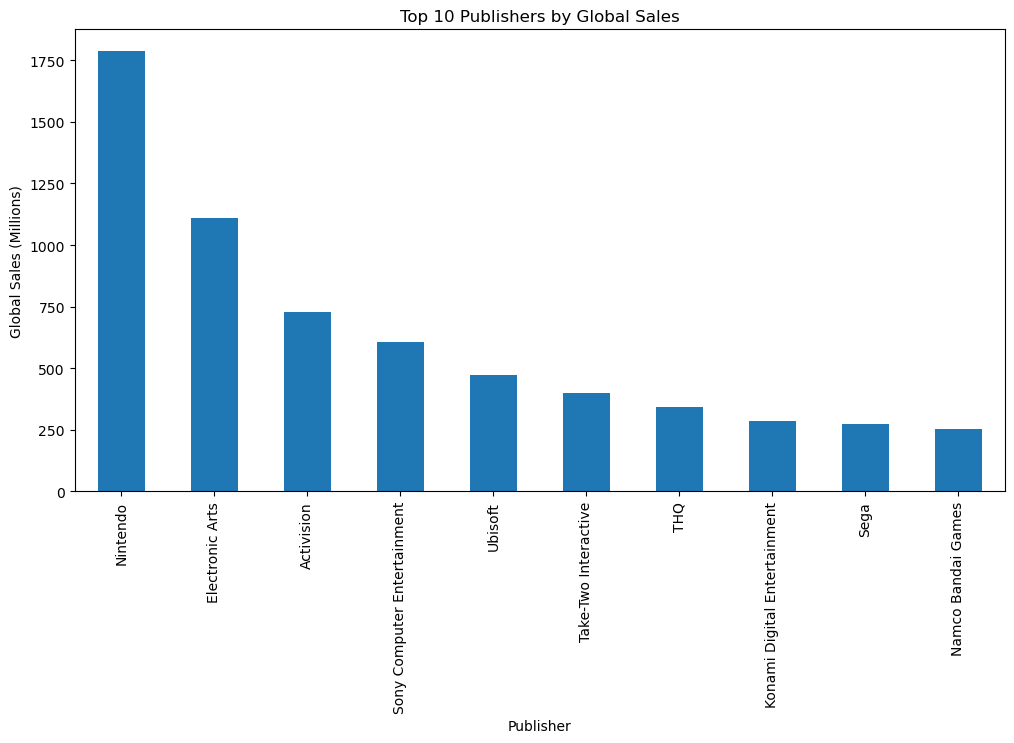

In [44]:
publisher_sales = data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
publisher_sales.plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (Millions)')
plt.show()


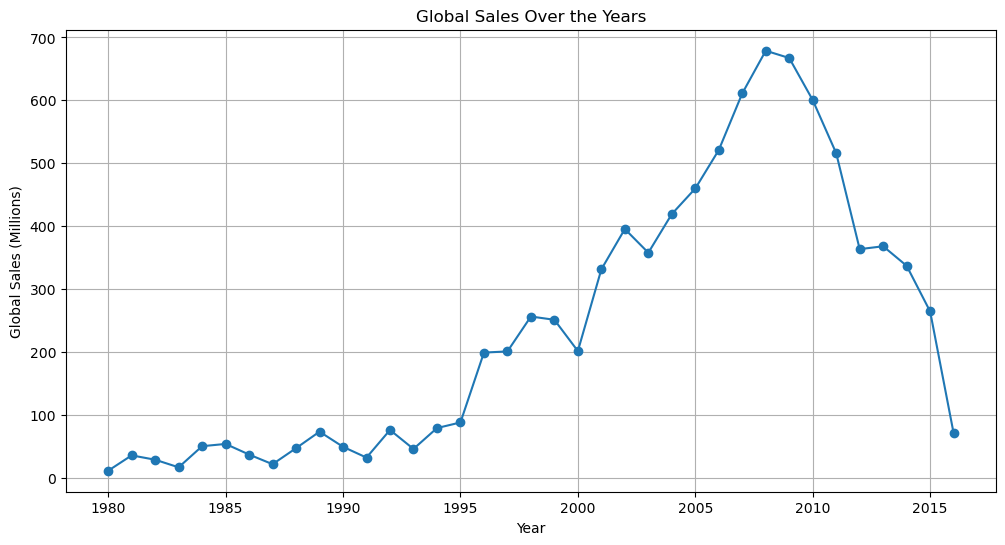

In [45]:
sales_per_year = data.groupby('Year')['Global_Sales'].sum()
sales_per_year.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Global Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.grid()
plt.show()